In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import jarque_bera
from scipy.stats import normaltest
import statsmodels.api as sm
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)


engine.dispose()

In [2]:
weather_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 7.7+ MB


There are no missing values in this dataset.  

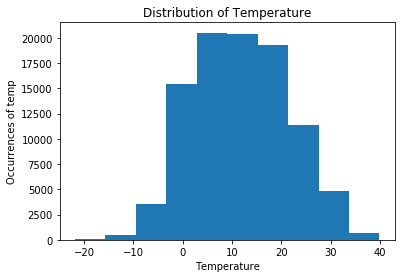

In [4]:
#Exploratory analysis
#Histogram of target variable - temperature
plt.hist(weather_df.temperature)
plt.xlabel('Temperature')
plt.ylabel('Occurrences of temp')
plt.title('Distribution of Temperature')

plt.show()

The distribution for temperature is pretty normal. 

In [5]:
#Relationship bw target variable (temperature) and explanatory variables (humidity, windspeed, windbearing, and pressure)

weather_corr = weather_df[['humidity', 'windspeed', 'windbearing', 'pressure']].corr()

weather_corr

,humidity,windspeed,windbearing,pressure
humidity,1.000000,-0.224951,0.000735,0.005454
windspeed,-0.224951,1.000000,0.103822,-0.049263
windbearing,0.000735,0.103822,1.000000,-0.011651
pressure,0.005454,-0.049263,-0.011651,1.000000


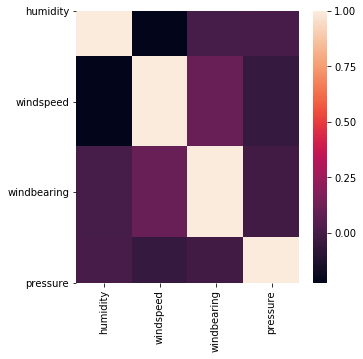

In [6]:
plt.figure(figsize=(5,5))

sns.heatmap(weather_corr)
plt.yticks(rotation='horizontal')

plt.show()

In [7]:
#Setting variables for model
X = weather_df[['humidity', 'windspeed', 'windbearing', 'pressure']]
Y = weather_df.temperature

In [8]:
#LinearRegression model object from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528512


In [9]:
#Running regression model

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Thu, 15 Aug 2019   Prob (F-statistic):               0.00
Time:                        08:03:03   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Meeting Gauss-Markov Conditions

#### Assumption 1: linearity of the model in its coefficients - Condition Met

This model's functional form is linear.  

#### Assumption 2: the error term should be zero on average - Condition Met
The average error term is close to zero. And since there is a constant in the model, the error term is effectively zero and the condition is met.  

In [10]:
X = weather_df[['humidity', 'windspeed', 'windbearing', 'pressure']]
Y = weather_df.temperature

predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the weather prediction model is: {}".format(np.mean(errors)))

Mean of the errors in the weather prediction model is: -6.185691729267529e-15


#### Assumption 3: homoscedasticity - Condition not met

Below are the Levene and Bartlett tests below to test for homoscedasticity.  Both tests p-value = 0.  Since this value is below 0.05, we reject the null hypothesis that are errors are homoscedastic.  Therefore the errors are heteroscedastic, and this condition is not met in the model.   

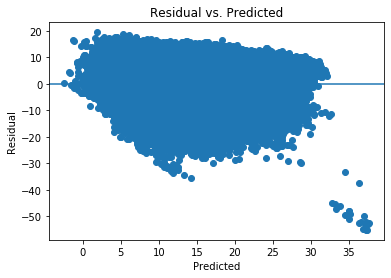

In [11]:
#Visually checking for homoscedasticity
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [12]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


#### Assumption 4: low multicollinearity - Condition Met
The correlation matrix shows that all of the explanatory variables are weakly correlated.  

#### Assumption 5: error terms should be uncorrelated with one another - Condition Met

The plots show that the error terms are uncorrelated with each other.  

The autocorrelation between the error terms in the weather prediction model range between .70 and .98.

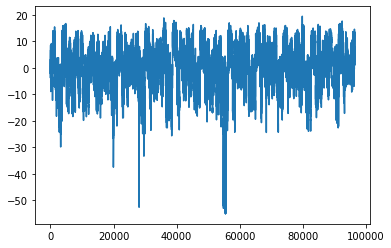

In [13]:
#Visualizing correlation bw error terms
plt.plot(errors)
plt.show()

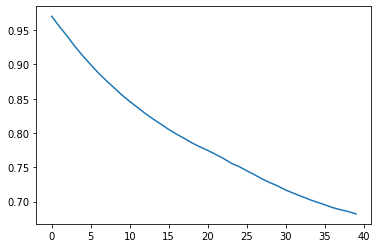

In [14]:
#Using autocorrelation function to determine if error terms are correlated
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

#### Assumption 6: features shouldn't be correlated with the errors - Condition Met

The correlation matrix belows shows that the errors are essentially uncorrelated with the features.

In [15]:
weather_df['errors'] = errors

weather_df[['humidity', 'windspeed', 'windbearing', 'pressure', 'errors']].corr()

,humidity,windspeed,windbearing,pressure,errors
humidity,1.000000e+00,-2.249515e-01,7.346454e-04,5.454263e-03,-8.612117e-15
windspeed,-2.249515e-01,1.000000e+00,1.038215e-01,-4.926281e-02,2.110144e-15
windbearing,7.346454e-04,1.038215e-01,1.000000e+00,-1.165088e-02,-2.005590e-16
pressure,5.454263e-03,-4.926281e-02,-1.165088e-02,1.000000e+00,-1.179335e-15
errors,-8.612117e-15,2.110144e-15,-2.005590e-16,-1.179335e-15,1.000000e+00


#### Normality of error terms - Condition not met
The histogram of the error terms shows that the error terms are slightly left skewed.  The Jarque-Bera and Normality tests both have p-values of 0 which indicates that the null hypotheses of normal distribution are rejected.  Therefore, the error terms are not normally distributed.  Since the error terms are non-normally distributed, the statistical signficance of the coefficients cannot be measured.

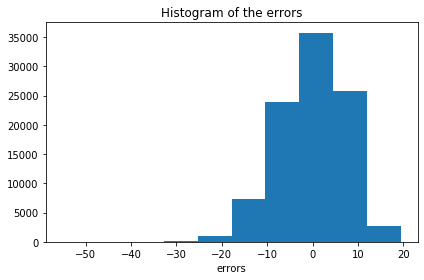

In [16]:
#Histogram to visualize explore normal distribution assumption of error terms
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [17]:
#Using Jarque-Bera and Normality tests to determine if error terms are normally distributed
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.2967352523133 and p value is 0.0
Normality test statistics is 3375.432307699554 and p value is 0.0
